In [1]:
# DL needs
import tensorflow as tf
import keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

import sys
sys.path.append('/home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/')
import important_functionalities as impf

2025-03-12 17:53:08.335547: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load data
data_dir='/home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/6_transfer_learning_feature_extraction/10_food_classes_10_percent'
train_dir=data_dir+'/train'
valid_dir=data_dir+'/test'

impf.walkthrough_directories(data_dir)

There are 2 directories and 0 images in /home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/6_transfer_learning_feature_extraction/10_food_classes_10_percent
There are 10 directories and 0 images in /home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/6_transfer_learning_feature_extraction/10_food_classes_10_percent/test
There are 0 directories and 250 images in /home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/6_transfer_learning_feature_extraction/10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in /home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/6_transfer_learning_feature_extraction/10_food_classes_10_percent/test/chicken_wings
There are 0 directories and 250 images in /home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/6_transfer_learning_feature_extraction/10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in /

**1. Using `tf.keras.preprocessing.image_dataset_from_directory()`**

In [3]:
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                               image_size=IMAGE_SHAPE,
                                                               label_mode='categorical',
                                                                batch_size=BATCH_SIZE
                                                               )
valid_data=tf.keras.preprocessing.image_dataset_from_directory(directory=valid_dir,
                                                               image_size=IMAGE_SHAPE,
                                                                label_mode='categorical',
                                                                 batch_size=BATCH_SIZE
                                                                )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [4]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [5]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [6]:
# see an example batch of data
for images, labels in train_data.take(1):
    print(images, labels)

tf.Tensor(
[[[[1.00000000e+01 2.00000000e+00 2.29591817e-01]
   [9.38265324e+00 4.38265276e+00 1.38265300e+00]
   [9.14285755e+00 4.14285755e+00 1.28571439e+00]
   ...
   [1.90943619e+02 1.81515091e+02 1.76300827e+02]
   [1.88658356e+02 1.85137970e+02 1.80469604e+02]
   [2.14219498e+02 2.14760345e+02 2.08989929e+02]]

  [[1.14744911e+01 6.47449112e+00 3.47449064e+00]
   [9.85714340e+00 4.85714340e+00 1.85714340e+00]
   [1.06581631e+01 6.08673429e+00 2.65816259e+00]
   ...
   [1.95719299e+02 1.86290771e+02 1.81474426e+02]
   [1.94459305e+02 1.91602188e+02 1.86602188e+02]
   [2.19571747e+02 2.20571747e+02 2.15571747e+02]]

  [[8.98979568e+00 4.20408154e+00 1.20408154e+00]
   [9.00000000e+00 4.21428585e+00 1.21428585e+00]
   [9.61734676e+00 5.83163261e+00 2.40306091e+00]
   ...
   [1.88494949e+02 1.78494949e+02 1.77663345e+02]
   [1.97372437e+02 1.92459229e+02 1.90015335e+02]
   [1.99775558e+02 1.99132736e+02 1.97132736e+02]]

  ...

  [[1.00000000e+00 3.00000000e+00 0.00000000e+00]
   [1

2025-03-12 17:53:11.151156: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


**2. Performing Various Experimentations**<br><br>

| Experiment | Data       | Preprocessing | Model          |
|------------|------------|---------------|----------------|
| Model 0<br>(baseline)     | 10 classes of food101 dataset (random 10% training data only)  | None        | Feature Extractor: EfficientNetB0 (pretrained on ImageNet, all layers frozen) with no top|
| Model 1     | 10 classes of food101 dataset (random 1% training data only)  | Random flip, Rotation, Height, Width data-augmentation       | Same as Model 0|
| Model 2     | Same as Model 0  | Same as Model 1       | Same as Model 0|
| Model 3     | Same as Model 0  | Same as Model 1       | Fine-tuning: Model2(EfficientNetB0 pretrained on ImageNet) with top layer trained on custom data, top 10 layers unfrozen|
| Model 4     | 10 classes of food101 dataset (100% training data)  | Same as Model 1       | Same as Model 3|

**2.1 Building a baseline model for running experiments**

| Experiment | Data       | Preprocessing | Model          |
|------------|------------|---------------|----------------|
| Model 0<br>(baseline)     | 10 classes of food101 dataset (random 10% training data only)  | None        | Feature Extractor: EfficientNetB0 (pretrained on ImageNet, all layers frozen) with no top|

**2.1.1. Building model using `Functional()` API**

In [7]:
# Model 0: Building a transfer learning model using Keras Functional API

### 1. Create the base model with tf.keras.applications
base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False,#exclude o/p layer
                                                                  weights='imagenet',
                                                                 input_shape=(224,224,3)) 

### 2. Freeze the layers in the base model
base_model.trainable=False

### 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')    

### 4. If using a model like ResNet50V2 you will need to normalize inputs (you don't have to for EfficientNet)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

### 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

### 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

### 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

### 8. Combine the inputs with the outputs into a model
model_0=tf.keras.Model(inputs,outputs)


### 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### 10. Fit the model and save its history
history_10_percent=model_0.fit(train_data,
                               epochs=5,
                               steps_per_epoch=len(train_data),
                               validation_data=valid_data,
                               validation_steps=int(0.25*len(valid_data)),
                               callbacks=[impf.create_tensorboard_callback(dir_name="transfer_learning",     experiment_name="10_percent_feature_extraction")])

Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to : transfer_learning/10_percent_feature_extraction/20250312-175312
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2878 - loss: 2.0955 - val_accuracy: 0.7401 - val_loss: 1.3282
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7608 - loss: 1.1976 - val_accuracy: 0.8092 - val_loss: 0.9004
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8129 - loss: 0.8795 - val_accuracy: 0.8372 - val_loss: 0.7206
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8380 - loss: 0.7085 - val_accuracy: 0.8240 - val_loss: 0.6441
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8591 - loss: 0.6226 - val_accuracy: 0.8306 - val_loss: 0.5938


In [8]:
# evaluate on complete validation data
model_0.evaluate(valid_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 660ms/step - accuracy: 0.8397 - loss: 0.5850


[0.5714222192764282, 0.8579999804496765]

In [9]:
# check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_layer
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

In [10]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 56, 56,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 56, 56,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 56, 56,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 56, 56,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 56, 56,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [11]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

<Figure size 640x480 with 0 Axes>

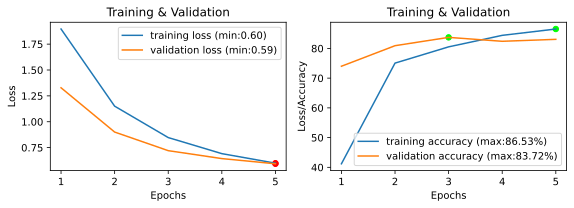

In [12]:
# check out model training curves
impf.plot_loss_curves(history_10_percent)

***-- CONTD IN NEXT NOTEBOOK --***